In [145]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy import integrate
from numpy import exp
import pandas as pd

In [146]:
# Read the csv file global.1751_2008 to obtain the gama value(Carbon emissions from fossil-fuels)
Carbon_emissions_fossil_fuels=pd.read_csv("global.1751_2008.csv")
# As required, select data rows from 1987 to 2004
df=Carbon_emissions_fossil_fuels.tail(22).head(18)
df.reset_index(drop=True, inplace=True)# Reset the dataframe index
# Transfer the Carbon emissions into the ppm units
df["gama_ppm"]=df["Total carbon emissions from fossil-fuels (million metric tons of C)"
                 ].astype(int)*(10**12)/(10**15)/2.13
df

,Year,Total carbon emissions from fossil-fuels (million metric tons of C),carbon emissions from gas fuel consumption,carbon emissions from liquid fuel consumption,carbon emissions from solid fuel consumption,carbon emissions from cement production,carbon emissions from gas flaring,Per capita carbon emissions (metric tons of carbon; after 1949 only),gama_ppm
0,1987,5755,894,2309.0,2364.0,143.0,44.0,1.15,2.701878
1,1988,5968,937,2414.0,2414.0,152.0,50.0,1.17,2.801878
2,1989,6088,973,2462.0,2457.0,156.0,41.0,1.17,2.858216
3,1990,6151,1020,2515.0,2419.0,157.0,40.0,1.16,2.887793
4,1991,6239,1062,2624.0,2348.0,161.0,44.0,1.16,2.929108
5,1992,6178,1094,2511.0,2372.0,167.0,35.0,1.13,2.900469
6,1993,6172,1119,2541.0,2301.0,176.0,36.0,1.11,2.897653
7,1994,6284,1133,2566.0,2361.0,186.0,38.0,1.12,2.950235
8,1995,6422,1154,2588.0,2446.0,197.0,38.0,1.12,3.015023
9,1996,6550,1208,2627.0,2473.0,203.0,39.0,1.13,3.075117


LinregressResult(slope=0.042129488316206165, intercept=-81.00424004870877, rvalue=0.9398255614474387, pvalue=7.150076443522602e-09, stderr=0.003828831926443388, intercept_stderr=7.640459932123952)


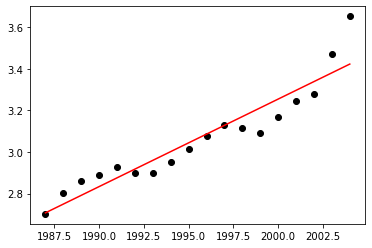

In [147]:
# Import stats
from scipy import stats
# Apply Linear Regression to gama for continuous data
time=np.array([i for i in range(1987,2005)])
gama=np.array(df["gama_ppm"])
plt.plot(time, gama, 'ko')
res = stats.linregress(time, gama)# Linear Regression
print(res)
plt.plot(time, res.slope*time+res.intercept, 'r-')
# Linregress Result shown below

In [148]:
# Read the csv file co2_annmean_mlo to obtain CO2 annual observation values
observations=pd.read_csv("co2_annmean_mlo.csv")
# Set two arrays to contain CO2 observation values and their corresponding time,
# used for comparisons with modeling results
time=np.array([i for i in range(1987,2005)])
CO2_observations=np.array(observations["mean(ppm)"][(observations["year"].astype(int)< 2005)
                                                    &(observations["year"].astype(int)> 1986)])
print(time)
print(CO2_observations)

[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004]
[349.31 351.69 353.2  354.45 355.7  356.54 357.21 358.96 360.97 362.74
 363.88 366.84 368.54 369.71 371.32 373.45 375.98 377.7 ]


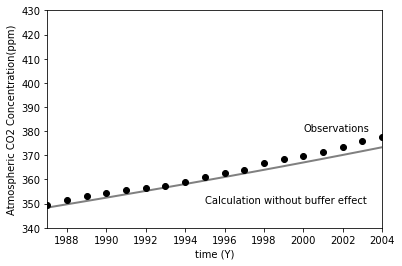

In [149]:
# 1.1 Solving ODEs: Following equation 1-2(without the buffer effect)
# Define the function "model(t,N)"
def model(t,N):
    N1,N2=N
    # N1 and N2 denote the carbon concentration of atmosphere and ocean respectively; t is time
    dN1dt = -(105/740) * N1 + (102/900) * N2 + res.slope*t+res.intercept # Gama value
    dN2dt = (105/740) * N1 - (102/900) * N2
    dNdt =[dN1dt,dN2dt]
    return dNdt

# Initial condition
N1986 = [347,423]
t = np.arange(1986,2005)

# Solve ODE
Sol = integrate.odeint(model,N1986,t,tfirst= True)

# Plot results
plt.plot(t, Sol[:,0],color="gray",linewidth =2.0)
# Compare with observation value
plt.plot(time,CO2_observations, "ko")
plt.xlabel("time (Y)")
plt.ylabel("Atmospheric CO2 Concentration(ppm)")
plt.ylim(340,430)
plt.xlim(1987,2004)
# Add annotation
plt.annotate("Calculation without buffer effect", xy=(2000,367.04), xytext=(1995,350),fontsize=10)
plt.annotate("Observations", xy=(2000,369.71),xytext=(2000,380),fontsize=10)
plt.show()

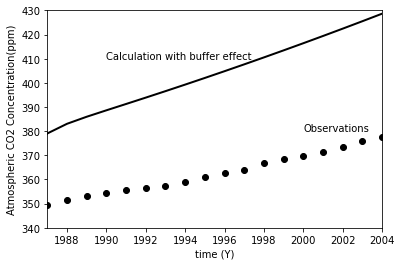

In [150]:
# 1.2 Solving ODEs: Following equation 1-2(with the buffer effect)
# Define the function "model2(t,N)"
def model2(t,N):
    N1,N2=N
    # Take buffer effect (ksi) into consideration
    ksi=3.69+1.86*10**(-2)*N1-1.80*10**(-6)*N1**2
    dN1dt = -(105/740) * N1 + (102/900) *(385+ksi*(N2-385)) + res.slope*t+res.intercept # Gama
    dN2dt = (105/740) * N1 - (102/900) *(385+ksi*(N2-385))
    dNdt =[dN1dt,dN2dt]
    return dNdt

# Initial condition
N1986 = [347,423]
t = np.arange(1986,2005)

# Solve ODE
Sol2 = integrate.odeint(model2,N1987,t,tfirst= True)

# Plot results
plt.plot(t, Sol2[:,0],color="black",linewidth =2.0)
# Compare with observation value
plt.plot(time,CO2_observations, "ko")
plt.xlabel("time (Y)")
plt.ylabel("Atmospheric CO2 Concentration(ppm)")
plt.ylim(340,430)
plt.xlim(1987,2004)
# Add annotation
plt.annotate("Calculation with buffer effect", xy=(1992,390),xytext=(1990,410),fontsize=10)
plt.annotate("Observations", xy=(2000,369.71),xytext=(2000,380),fontsize=10)
plt.show()

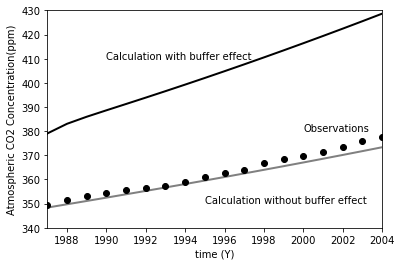

In [151]:
# 1.3 Reproduce the results of 1.1 and 1.2
plt.plot(t, Sol[:,0],color="gray",linewidth =2.0)
plt.plot(t, Sol2[:,0],color="black",linewidth =2.0)
plt.plot(time,CO2_observations, "ko")
plt.xlabel("time (Y)")
plt.ylabel("Atmospheric CO2 Concentration(ppm)")
plt.ylim(340,430)
plt.xlim(1987,2004)
plt.annotate("Calculation with buffer effect", xy=(1992,390),xytext=(1990,410),fontsize=10)
plt.annotate("Calculation without buffer effect", xy=(2000,367.04), xytext=(1995,350),fontsize=10)
plt.annotate("Observations", xy=(2000,369.71),xytext=(2000,380),fontsize=10)
plt.show()